In [ ]:
!source activate notebook

In [1]:
import torch
from torchaudio import load as load_audio
from torchaudio import sox_effects
from utils import play_audio, plot_waveform
import torchaudio.functional as F
import torchaudio.transforms as T
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

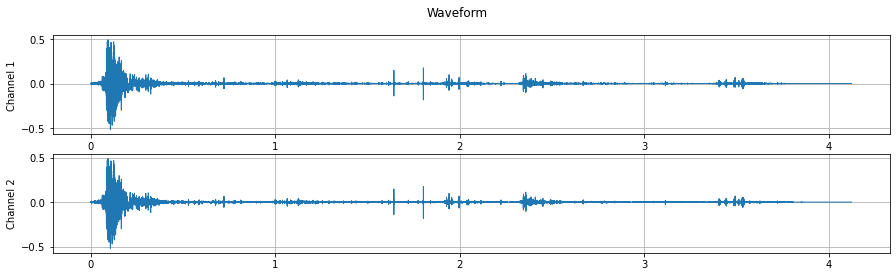

In [3]:
sample_path = "data/gore_axe_hitting_flesh_and_splatter_of_blood.wav"
waveform, sample_rate = torchaudio.load(sample_path)

#print_stats(waveform, sample_rate=sample_rate)
plot_waveform(waveform, sample_rate)
#plot_specgram(waveform, sample_rate)
play_audio(waveform, sample_rate)

In [3]:
def set_def(effect_properties):
    freq_info = F.detect_pitch_frequency(waveform, sample_rate)
    default_f = int(freq_info.mean())
    f_min = int(freq_info.min()/2)
    f_max = int(freq_info.max()*2)
    
    sec_info = waveform.size()[1]/sample_rate
    default_s = int(sec_info/2)
    s_min = 0
    s_max = sec_info
    
    for fx in effect_properties.values():
        if 'wdgt' in fx.keys():
            if fx['default'] == 'freq':
                fx['wdgt'][0].value = default_f
                fx['wdgt'][0].max = f_max
                fx['wdgt'][0].min = f_min
            elif fx['default'] == 'sec':
                fx['wdgt'][0].value = default_s
                fx['wdgt'][0].min = s_min
                fx['wdgt'][0].max = s_max

In [4]:
EFFECTS = {'fadein': {'usage':['fade'], 'wdgt': [widgets.IntSlider(continuous_update=True, description='fade in sec')], 'default': 'sec', 'temp': [10]},
           'fadeout': {'usage':['fade', '0', '0'], 'wdgt': [widgets.IntSlider(continuous_update=True, description='fade out sec')], 'default': 'sec', 'temp': [10]},
           'reverb': {'usage':['reverb']},
           'highpass': {'usage':['highpass'], 'wdgt': [widgets.IntSlider(continuous_update=True, description='highpass freq')], 'default': 'freq', 'temp': [100]},
           'lowpass':{'usage':['lowpass'], 'wdgt': [widgets.IntSlider(continuous_update=True, description='lowpass freq')], 'default': 'freq', 'temp': [100]}}

In [10]:
def take_final_val(chosed):
    final_filters = [effect_properties[filtr] for filtr in chosed]
    values = [[str(val.value) for val in filtr['wdgt']] if 'wdgt' in filtr.keys() else [None] for filtr in final_filters]
    usages = [filtr['usage'] for filtr in final_filters] #will come one more layer
    effects = [x+[str(y[0])] if y[0] != None else x for x,y in zip(usages, values)]
    return effects

In [12]:
output = widgets.Output()
@output.capture(clear_output=True,wait=True)
def apply_sox(b):
    fif=my_interactive.result
    effects = take_final_val(fif)
    

    res_wav, s_rate = torchaudio.sox_effects.apply_effects_tensor(waveform, sample_rate, effects, channels_first=True)
    plot_waveform(res_wav, s_rate)
    play_audio(res_wav, s_rate)

In [13]:
def display_fx_settings(selections):
    set_def(effect_properties)
    for i in selections:
        if 'wdgt' in effect_properties[i].keys():
            for idx, wii in enumerate(effect_properties[i]['wdgt']): #enumerate and took idx use for asign default
                display(wii)
    print(selections)
    return selections

In [14]:
effect_properties = {**EFFECTS} #update
my_interactive = interactive(display_fx_settings, selections=widgets.SelectMultiple(options=list(effect_properties.keys())))
display(my_interactive)
run_button=widgets.Button(description='Run')
run_button.on_click(apply_sox)
display(run_button)

interactive(children=(SelectMultiple(description='selections', options=('fadein', 'fadeout', 'reverb', 'highpa…

Button(description='Run', style=ButtonStyle())

In [15]:
output

Output()